# K-means algoritms on Iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.cluster import KMeans
X = df.iloc[:, 2:4].values
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [4]:
kmeans = KMeans(n_clusters=3, random_state=7).fit(X)

In [5]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

## Actual labels

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

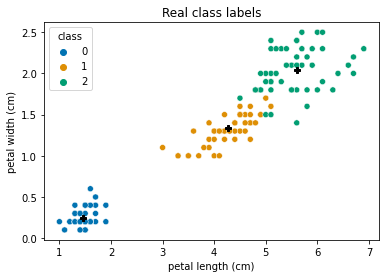

In [7]:
sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue = df['class'], palette='colorblind')
plt.title('Real class labels')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'kP')
plt.show()

## K-means predicted labels

In [8]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

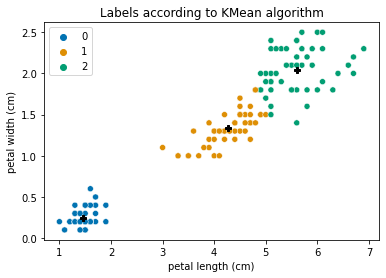

In [9]:
mapping = {0:0, 1:2, 2:1} # mapping 1 to 2 and 2 to 1
labels = [mapping[x] for x in kmeans.labels_] 

sns.scatterplot(df['petal length (cm)'], df['petal width (cm)'], hue = labels, palette='colorblind')
plt.title('Labels according to KMean algorithm')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'kP')
plt.show()

## Finding the optimum number of clusters (elbow method)

We are plotting sum of squared distances of samples to their closest cluster center.

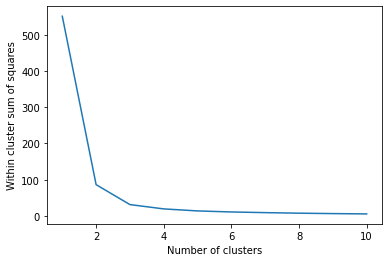

In [10]:
from sklearn.cluster import KMeans
css_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 7)
    kmeans.fit(X)
    css_list.append(kmeans.inertia_)
    -
plt.plot(range(1, 11), css_list)
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()